Ipython3 Notebook for experiment nr. 243
================

it is assumend, that this notebook is in the same directory as the module for this experiment.

change the filenames and paths according to your set up

In [6]:
## using inline plots
%matplotlib inline

## importing the necessary modules
import numpy as np
import matplotlib.pyplot as pltt
import pylab as py
import ap22_module as main
import uncertainties as unc
import uncertainties.unumpy as unp
from scipy.optimize import curve_fit
from scipy.stats import chi2
import matplotlib as mpl; mpl.rc('text', usetex=True) ## if latex complains about anything, re-run the cell and hope for the best ;)

2) Auswertung des Frequenzganges
===

[  1.05028226e+03   1.02591451e+03   4.66793601e+04   5.04848878e+00
   4.80631900e+00] [  2.61009884e+00   1.98713159e+00   9.94020553e+01   2.26168661e-02
   1.86135240e-02]
chisquare= 10123.685014 , chisquare_red= 91.2043694953
propability=73.58%
[ -1.01947843e+00   1.10280559e+00  -6.30226082e-01  -1.08905104e+00
  -1.36951953e-01   2.36893790e+00   1.57602510e+00  -2.36609297e+00
   6.91076375e-01   8.90448640e-01  -1.63652246e+00  -1.77734676e+00
   5.52264721e-01   3.97475602e-01   2.75203558e+00   2.54533880e+00
  -3.69971842e-01   3.77186437e+00  -3.55999822e-01   1.82793488e+00
  -1.76933375e-01  -1.93422562e+00   9.57390025e-01  -2.10144074e+00
  -6.67414532e+00  -8.25433742e+00  -2.06141620e+01  -1.88951507e+01
  -1.48911681e+01  -6.32295242e+00  -1.52787719e+01  -9.93411307e+00
  -1.48083155e+01  -9.75836654e+00  -9.73706813e+00   2.72585605e-01
   2.77198959e-01  -9.72049204e+00  -1.47192883e+01  -1.47186376e+01
  -1.47182742e+01  -9.71806537e+00  -1.47179421e+01  -1.4717

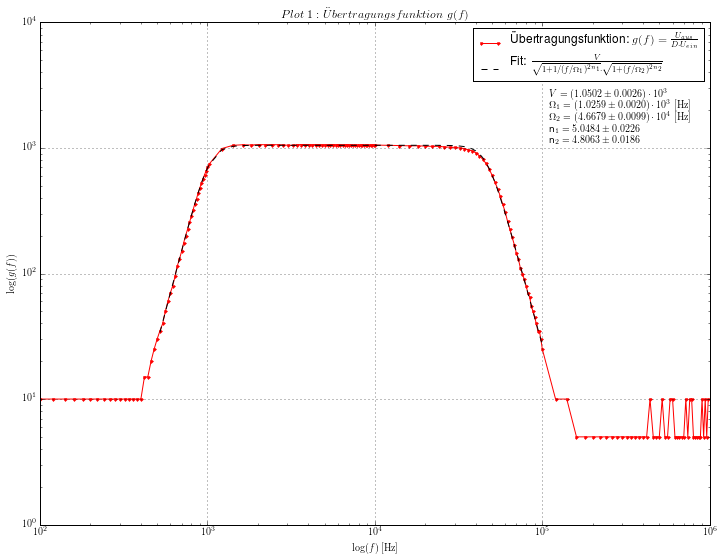

In [13]:
## loading the measured data set: Frequency, voltage (rms) and dBV(unnecessary)
f, Ua, dBV = main.load_data('.data/frequenzgang_data.txt')

## computing g(f)
D = unc.ufloat(0.001, 2e-3*0.001) # damping 
Ue = 0.2 #Input voltage, Vrms
g = Ua/(D*Ue)

## fitting section
def g_fit(f, v, fg1, fg2, n1, n2):
    ## f..freqency, v..amplification, fg*..cutoff frequency, n*..filter order
    return v / (np.sqrt(1 + 1/((f/fg1)**(2*n1))) * np.sqrt(1 + (f/fg2)**(2*n2)))

## defining starting values
p0 = [1000, 1000, 50000, 5, 5]

## fit should start at the beginnig of the linear part of the measured data and should end with the end of the linear part. [500-100000 Hz]
popt, pcov = curve_fit(g_fit, f[21:137], unp.nominal_values(g)[21:137], sigma=unp.std_devs(g)[21:137], p0=p0)

## errors of the optimal parameters:
popt_err = np.sqrt(np.diag(pcov))
print(popt, popt_err)


## chi_square und chi_square_reduced berechnen
#chi_square = np.sum(((g_fit(f[21:137], *popt)-unp.nominal_values(g)[21:137])/unp.std_devs(g)[21:137])**2)
#print(chi_square)
#dof = 111 #dof: degees of freedom, Zahl der Messwerte abzueglich Zahl der Parameter
#print("dof=",dof)
#print("chisquare=", chi_square, ", chisquare_red=",chi_square/dof)
#print("propability="+str(round(100-chi2.cdf(chi_square/100,dof)*100,2))+"%") #cdf: cumulative distribution function
#print(g_fit(f[21:137], *popt)-unp.nominal_values(g)[21:137])

## string for the parameters in the plot
val_str = '$V=(1.0502\pm0.0026)\cdot 10^3 \n \Omega_1=(1.0259\pm0.0020)\cdot 10^3\ \mathrm{[Hz]} \n \Omega_2=(4.6679\pm0.0099)\cdot 10^4\ \mathrm{[Hz]} \n n_1=5.0484\pm0.0226 \n n_2=4.8063\pm0.0186$'

## plotting section
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.plot(f, unp.nominal_values(g),'r.-', label='\\"{U}bertragungsfunktion: $g(f) = \\frac{U_{aus}}{D \cdot U_{ein}}$')
ax.plot(f[21:137], g_fit(f[21:137], *popt), 'k--', 
        label='Fit: $\\frac{V}{\sqrt{1+1/(f/\Omega_1)^{2n_1}} \cdot \sqrt{1+(f/\Omega_2)^{2n_2$}}}$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\mathrm{log}(f)\ \mathrm{[Hz]}$')
ax.set_ylabel('$\mathrm{log}(g(f))$')
ax.set_title('$Plot\ 1: \\"{U}bertragungsfunktion\ g(f)$')
ax.grid(axis='both')
ax.text(109000, 1100, val_str)
ax.legend()
#fig.savefig('.data/plot1.pdf', format='pdf', dpi=200)

3) Bestimmung der Boltzmannkonstante
===

[ 0.79681198 -0.05602434] [ 0.00250147  0.02994314]
98.0932350102
dof= 5
chisquare= 98.0932350102 , chisquare_red= 19.618647002
propability=0.0%
(1.309+/-0.004)e-23 

0.0+/-0
3.946+/-0.005
7.880+/-0.008
11.843+/-0.010
15.855+/-0.015
19.898+/-0.016
23.946+/-0.018


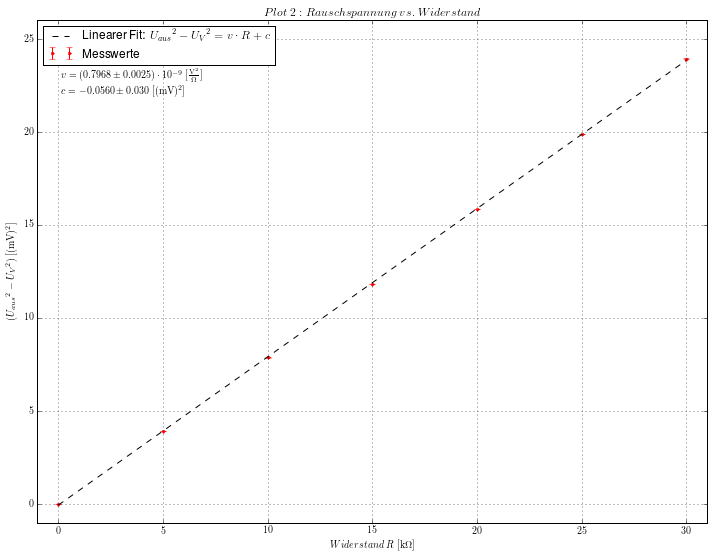

In [27]:
## load the measured values
R, N, MW, sigma, sigmaMW = main.load_data('.data/messwerte.dat')
R_err = R*0.005

## noise with error
MW = unp.uarray(MW, sigmaMW)
#print('Uaus^2 - Uv^2\n', MW**2 - MW[0]**2)
Y = MW**2 - MW[0]**2

## fitting section
def lin_reg(x, k, c):
    return x*k+c

popt, pcov = curve_fit(lin_reg, R[1:], unp.nominal_values(Y)[1:], sigma=unp.std_devs(Y)[1:])
popt_err = np.sqrt(np.diag(pcov))
print(popt, popt_err)

##string for parameters in plot
val_str = '$v = (0.7968\pm0.0025) \cdot 10^{-9}\ \mathrm{[\\frac{V^2}{\Omega}]} \n $ c = -0.0560\pm0.030\ \mathrm{[(mV)^2]}$'

## plotting section
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.errorbar(R, unp.nominal_values(Y), yerr=unp.std_devs(Y), fmt='r.', label='Messwerte')
ax.plot(R, lin_reg(R, *popt), 'k--', label='Linearer Fit: ${U_{aus}}^2 - {U_V}^2 = v \cdot R + c$')
ax.set_xlim(-1, 31)
ax.set_ylim(-1, 26)
ax.grid(axis='both')
ax.set_xlabel('$Widerstand\ R\ \mathrm{[k\Omega]}')
ax.set_ylabel('$({U_{aus}}^2 - {U_V}^2)\ \mathrm{[(mV)^2]}$')
ax.set_title('$Plot\ 2: Rauschspannung\ vs.\ Widerstand$')
ax.text(0.1, 22, val_str)
ax.legend(loc=0)

##save the fig
#fig.savefig('.data/plot2.pdf', format='pdf', dpi=200)

##goodness of fit
## chi_square und chi_square_reduced berechnen
chi_square = np.sum(((lin_reg(R[1:], *popt)-unp.nominal_values(Y[1:]))/unp.std_devs(Y[1:]))**2)
print(chi_square)
dof = len(R)-len(popt) #dof: degees of freedom, Zahl der Messwerte abzueglich Zahl der Parameter
print("dof=",dof)
print("chisquare=", chi_square, ", chisquare_red=",chi_square/dof)
print("propability="+str(round(100-chi2.cdf(chi_square,dof)*100,2))+"%") #cdf: cumulative distribution function

## Estimation of the Boltzmann constant v = 4*kTB
## slope and error
slope = unc.ufloat(popt[0], popt_err[0])*10**(-9)
T = 273.15 + unc.ufloat(23.8,0.1) # temperature in Kelvin
B = 5.12613e10 # bandwith in Hz
k = slope / (4*T*B)
print(k,'\n')
for i in Y:
    print(i)